<a href="https://colab.research.google.com/github/switlanakostyuk-ctrl/Apollo/blob/main/%22HW_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [146]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [147]:
# кількість_рядків, кількість_стовпців
df.shape

(10886, 19)

In [148]:
# Перегляд перших рядків
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [149]:
# Перевірка періоду даних
df.index.min(), df.index.max()


(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [150]:
# Перевірка кроку часу
df.index.to_series().diff().value_counts()

,count
datetime,
0 days 01:00:00,10820
0 days 02:00:00,36
12 days 01:00:00,13
11 days 01:00:00,8
0 days 03:00:00,5
0 days 13:00:00,1
9 days 01:00:00,1
10 days 01:00:00,1


<h1> Висновок </h1>

- У наборі даних 10886 рядків, 19 стовпців

- Дані охоплюють період з 2011 по 2012 рік.

- Кожен рядок відповідає одній годині (деталізація — погодинна).

Тобто це часовий ряд з погодинною агрегацією кількості оренд велосипедів. Можна аналізувати пікові години, досліджувати будні чи вихідні, аналізувати сезонність
й будувати часові тренди.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [151]:
# Групування даних поденно

daily_rentals = df.groupby("date")["count"].sum()
daily_rentals.head()

,count
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


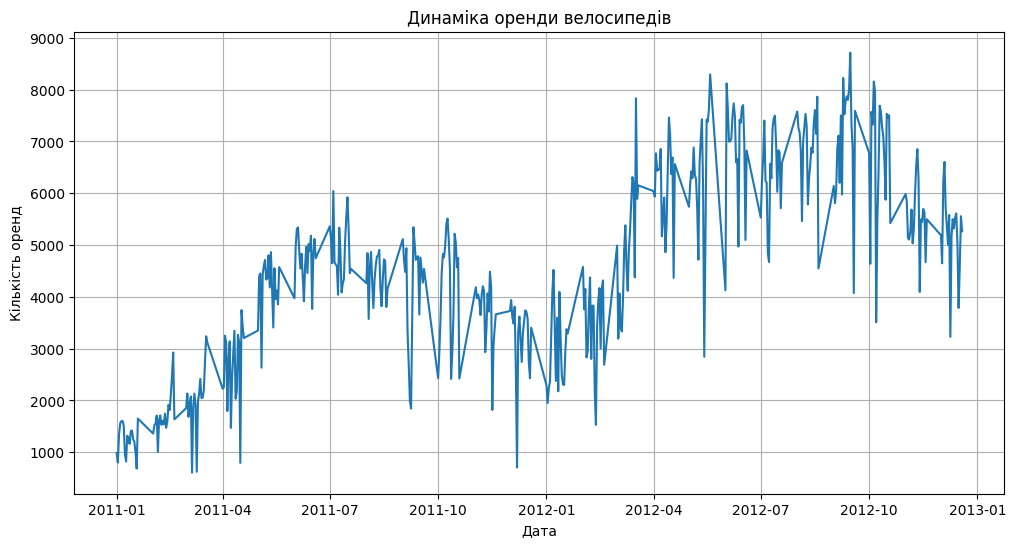

In [179]:
daily_rentals.plot(
    figsize=(12, 6),
    title="Динаміка оренди велосипедів",
    grid=True)

plt.xlabel("Дата")
plt.ylabel("Кількість оренд")
plt.show()


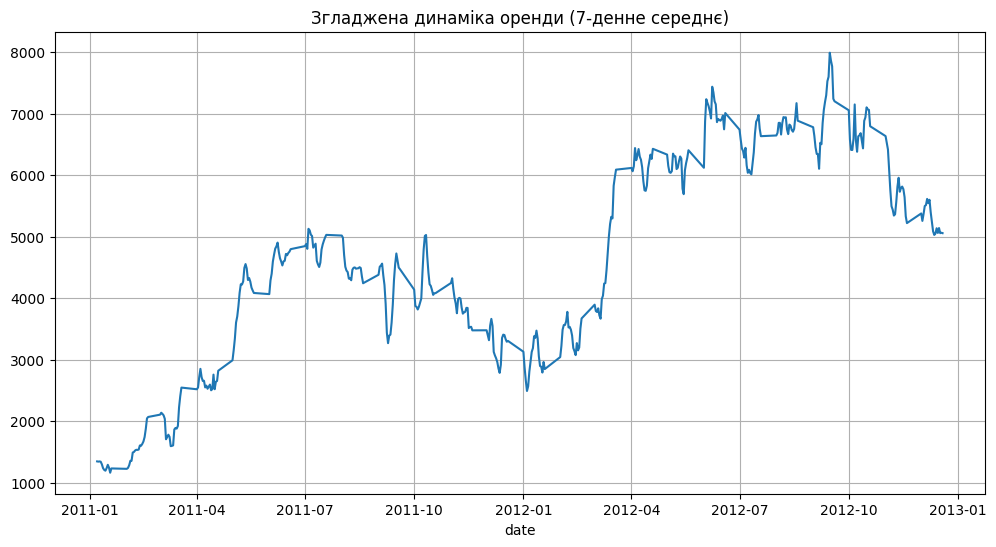

In [153]:
daily_rentals_rolling = daily_rentals.rolling(window=7).mean()

daily_rentals_rolling.plot(
    figsize=(12, 6),
    title="Згладжена динаміка оренди (7-денне середнє)",
    grid=True
)

plt.show()


In [154]:
daily_rentals.sort_values(ascending=False).head()

# топ п'ять днів з найбільшою кількістю оренд

,count
date,
2012-09-15,8714
2012-05-19,8294
2012-09-09,8227
2012-10-05,8156
2012-06-02,8120


In [155]:
daily_rentals.sort_values().head()

# топ п'ять днів з найменшою кількістю оренд

,count
date,
2011-03-06,605
2011-03-10,623
2011-01-18,683
2011-12-07,705
2011-04-16,795


In [156]:
lowest_days = daily_rentals.nsmallest(5).index
highest_days = daily_rentals.nlargest(5).index


In [157]:
df[df['date'].isin(lowest_days)].groupby('date')[['temp','weather']].mean()
# найменше

,temp,weather
date,,
2011-01-18,8.883333,2.000000
2011-03-06,15.437391,2.391304
2011-03-10,15.952727,2.909091
2011-04-16,17.664167,2.500000
2011-12-07,16.810000,2.791667


In [158]:
df[df['date'].isin(highest_days)].groupby('date')[['temp','weather']].mean()
# найбільше

,temp,weather
date,,
2012-05-19,24.600000,1.000000
2012-06-02,23.916667,1.166667
2012-09-09,25.010000,1.041667
2012-09-15,24.941667,1.208333
2012-10-05,25.215000,1.000000


1. Заломи на графіку є через особливість даних. Упродовж року були різкі зміни погоди, перепади температури, а також відмінність між буднями і вихідними. По даних видно що найменша температура що була це 8 градусів, а в дні з найбільшою кількістю оренд 25 градісів. Тобто заломи появляються коли є реакція через погоду чи сезон.
Згладити заломи у графіку можна через ковзне середнє (rolling average).
2. Є загальний зростаючий тренд у 2012 році, набагато вищий ніж у 2011.
3. Так, є чітка сезонність. Весною і літом - високий попит. Зима - низький. Осінь - середній попит. Це підтверджується високими температурами в топ-днях, і низькими температурами в днях з мінімальним показником.
4. Аномальні значення пояснюються погодними умовами: холодна та дощова погода знижує попит, тоді як тепла та ясна сприяє його зростанню.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

In [159]:
df['quarter'] = df.index.quarter

In [160]:
quarter_avg = df.groupby('quarter')['count'].mean()
quarter_avg

,count
quarter,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


In [161]:
quarter_labels = {
    1: 'Q1 (Січ–Бер)',
    2: 'Q2 (Кві–Чер)',
    3: 'Q3 (Лип–Вер)',
    4: 'Q4 (Жов–Гру)'
}

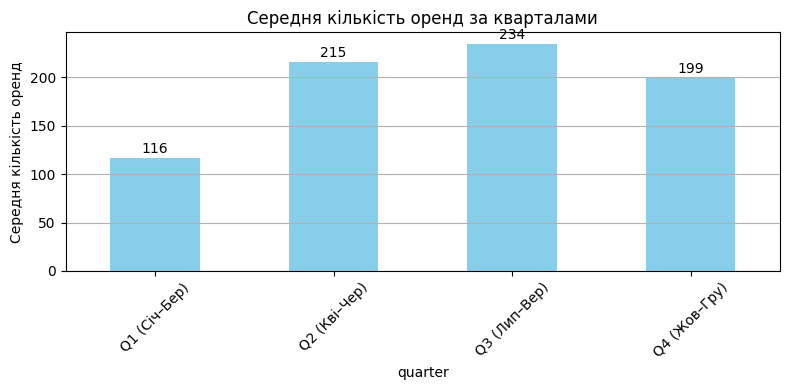

In [162]:
ax = quarter_avg.plot.bar(
    figsize=(8, 4),
    color='skyblue',
    title='Середня кількість оренд за кварталами',
    ylabel='Середня кількість оренд'
)


labels = [quarter_labels[q] for q in quarter_avg.index]
ax.set_xticklabels(labels)

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# підписи над стовпцями
for i, value in enumerate(quarter_avg):
    plt.text(i, value + 5, f'{value:.0f}', ha='center')

plt.show()

In [163]:
ratio = quarter_avg.max() / quarter_avg.min()
ratio

2.0148749597441986

### Відповіді на запитання

1. Найбільша середня кількість оренд припала на третій квартал - Q3 (літо / початок осені).
2. Така сезонність зумовлена теплою температурою, сухою погодою, виикою активністю людей, а також може бути туристичний сезон. Зимою Q1 показує мінімальний попит через холод і несприятливі умови.
3. Відрізняється у два рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [164]:
avg_rentals_by_month = df.groupby('month')['count'].mean()
avg_rentals_by_month

,count
month,
1,90.366516
2,110.003330
3,148.169811
4,184.160616
5,219.459430
6,242.031798
7,235.325658
8,234.118421
9,233.805281


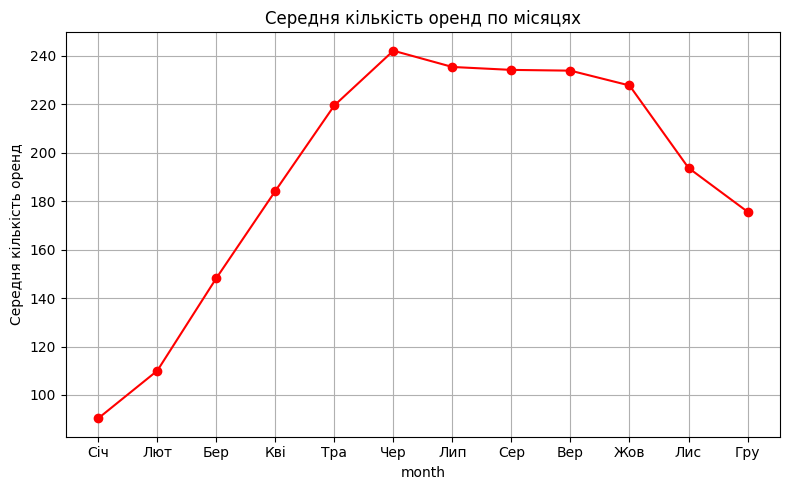

In [165]:
ax = avg_rentals_by_month.plot(
    figsize=(8, 5),
    color='red',
    marker='o',
    title='Середня кількість оренд по місяцях',
    ylabel='Середня кількість оренд'          )

month_labels = [
    'Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер',
    'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру' ]

ax.set_xticks(range(1, 13))              # 12 поділок
ax.set_xticklabels(month_labels)         # заміна цифр на назви

plt.grid(True)
plt.tight_layout()
plt.show()

Відповіді на запитання

1. Червень-вересень - пікові місяці. Січень-березень - мінімальні.

2. Так, збігається з попередніми результатами.
Q3 був найсильніший → це липень–вересень
Q1 був найслабший → це січень–березень

3. Спостерігається чітка кореляція між погодними факторами та обсягами оренди: показники зростають за комфортних температур і суттєво знижуються під час опадів

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

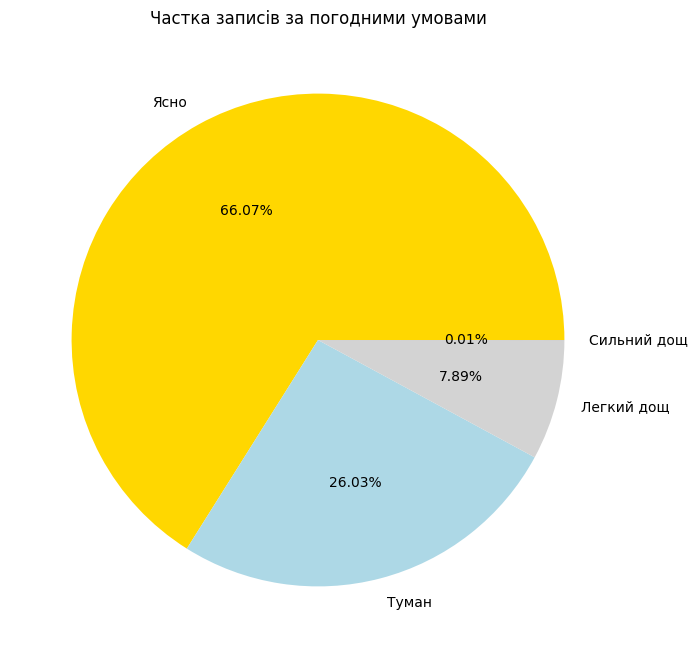

In [166]:
weather_counts = df['weather'].value_counts(). sort_index()
weather_counts

,count
weather,
1,7192
2,2834
3,859
4,1


In [167]:
weather_percent = df['weather'].value_counts(normalize=True).sort_index() * 100

In [168]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
            }

In [169]:
labels = [
    f"{weather_labels[i]} – {weather_percent[i]:.2f}%"
    for i in weather_percent.index
]

In [170]:
colors = ['#4CAF50', '#FFC107', '#2196F3', '#F44336']

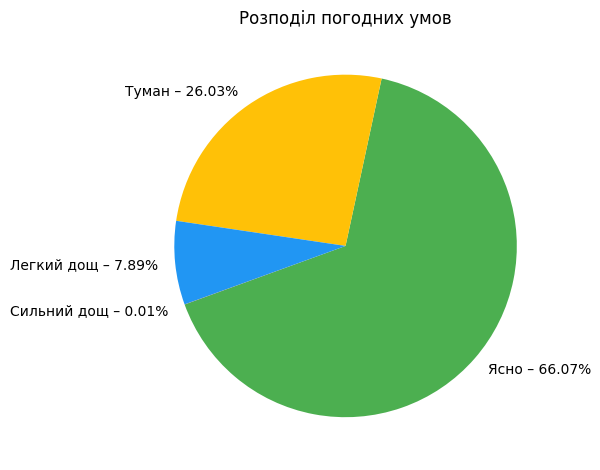

In [171]:
plt.figure(figsize=(6,6))

plt.pie(
    weather_percent,
    labels=labels,
    colors=colors,
    startangle=200
)

plt.title('Розподіл погодних умов')
plt.tight_layout()
plt.show()

# Відповіді на запитання

1. Переважає ясна погода.
2. Так, є дні з сильним дощем. Їхня частка 0,01%.
3. Погодні умови суттєво впливають на попит: у сприятливу погоду кількість оренд зростає, тоді як за несприятливих умов знижується.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [172]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

df['weather_name'] = df['weather'].map(weather_labels)

In [173]:
ordered_weather = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']

df['weather_name'] = pd.Categorical(
    df['weather_name'],
    categories=ordered_weather,
    ordered=True
)

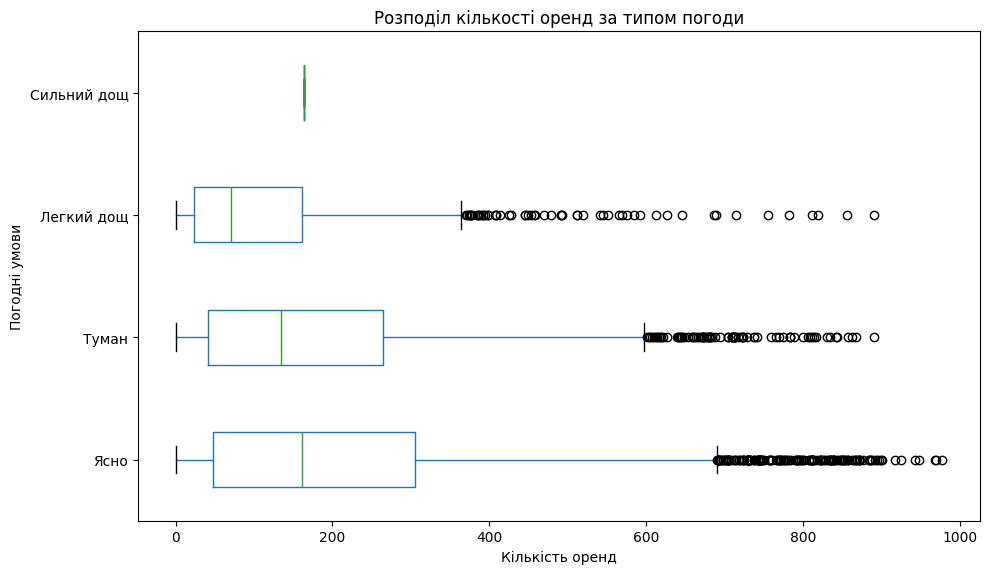

In [174]:
df.boxplot(
    column='count',
    by='weather_name',
    figsize=(10, 6),
    grid=False,
    vert=False
)

plt.title('Розподіл кількості оренд за типом погоди')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')
plt.suptitle('')  # прибирає автоматичний заголовок
plt.tight_layout()
plt.show()

# Відповіді на запитання

1. Найбільший розкид при ясній погоді, бо в хорошу погоду багато і помірно орендують. Тут великий діапазон значень.
2. Так, викиди є. При ясні погоді дуже великі значення викидів, а також трохи менші при легкому дощі і тумані.
3. Найвища медіана у ясній погоді

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

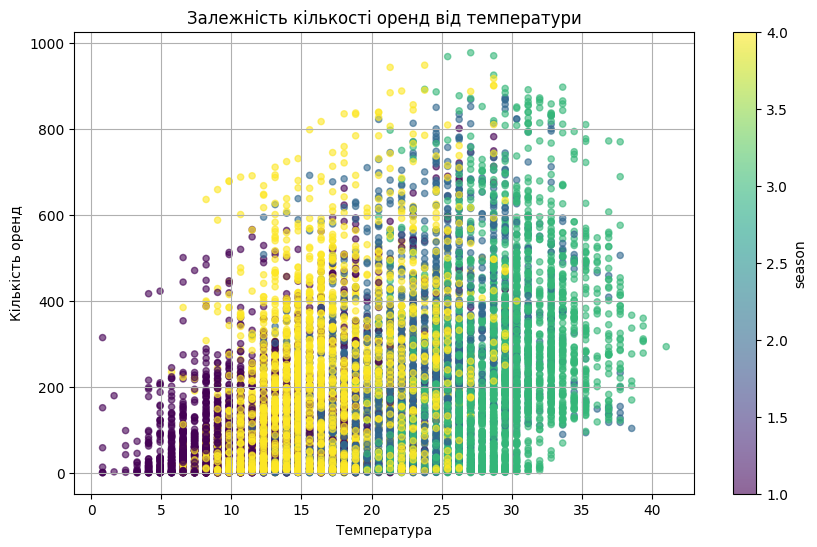

In [175]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',              # колір за сезонами
    colormap='viridis',
    alpha=0.6,
    figsize=(10, 6),
    title='Залежність кількості оренд від температури'
)

plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.show()


# Відповідь на запитання

Так, зв'язок є. За комфортної температури 20–30°C - найвищий попит. Найбільша концентрація високих значень є під час теплої погоди. Взимку нижчі значення.  Це свідчить про значний вплив кліматичних умов на поведінку користувачів.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [176]:
avg_users_by_day = df.groupby('weekday')[['casual', 'registered']].mean()
avg_users_by_day

,casual,registered
weekday,,
Friday,31.001962,166.842381
Monday,29.843972,160.546744
Saturday,63.625000,133.040404
Sunday,57.051298,123.788474
Thursday,24.007083,173.289118
Tuesday,22.979207,166.744639
Wednesday,22.521599,165.889749


In [177]:
ordered_days = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

avg_users_by_day = avg_users_by_day.reindex(ordered_days)

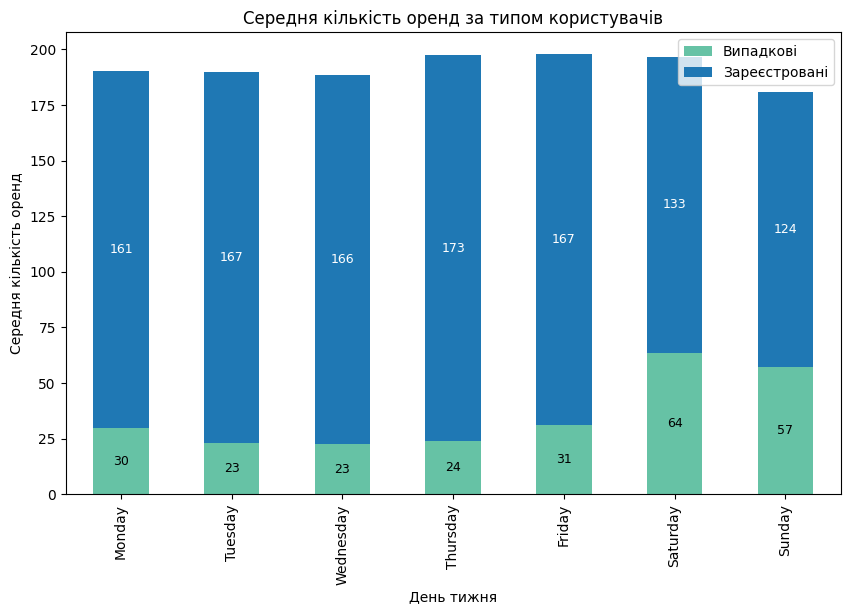

In [178]:
ax = avg_users_by_day.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#66c2a5', '#1f78b4'],
    title='Середня кількість оренд за типом користувачів'
)

ax.set_xlabel('День тижня')
ax.set_ylabel('Середня кількість оренд')



for i, day in enumerate(avg_users_by_day.index):
    casual = avg_users_by_day.loc[day, 'casual']
    registered = avg_users_by_day.loc[day, 'registered']

    ax.text(i, casual / 2,
            f'{casual:,.0f}',
            ha='center', va='center', fontsize=9)

    ax.text(i, casual + registered / 2,
            f'{registered:,.0f}',
            ha='center', va='center',
            fontsize=9, color='white')

ax.legend(['Випадкові', 'Зареєстровані'])

Найбільша кількість оренд від зареєстрованих користувачів припадає на будні дні, з піком у четвер (173 середніх оренд).Люди регулярно використовують сервіс для поїздок на роботу або навчання.
 На вихідних більше появляється випадкових користувачів, це може бути пов'язано з туризмом чи прогулянками.